In [1]:
# Import modules
import numpy as np # maths

from time import time# timer for debug

    # gather results obtained from the runs
import pickle # open .pkl files where python objects have been saved
from safe import safe # the empty class which is used to save the results
    
    # system commands
import os
    
    # interact with the C++ core and the Python core
import dimers as dim # C++ interface module
import KagomeFunctions as kf # "library" allowing to work on Kagome
import KagomeDrawing as kdraw # "library" allowing to plot Kagome
import Observables as obs #observables that can be used by the run script
import KagomeFT as kft #small functions to compute the FT
import AnalysisFunctions as af # functions to make the analysis code cleaner
    #plots using matplotlib
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['axes.unicode_minus'] = False
matplotlib.rcParams.update({'font.size': 14, 'pgf.texsystem':'pdflatex'})

In [2]:
# Create a folder to save the pictures
foldername = ''
#foldername = '../Analysis_PSI/Runs_12-11-19_ssfMagnField/'
results_foldername = 'ResultsJ1J2/'
os.makedirs('./' + foldername + 'Plots' + results_foldername, exist_ok = True)

filenamelist = ['testJ1J2']
n = len(filenamelist)

In [3]:
[L, numsites, J1, J2, J3, J3st, J4, nb, num_in_bin, temperatures, nt, stat_temps, 
 temperatures_plots, listfunctions, sref] = af.LoadParameters(foldername, filenamelist)

binning!
128  ---  0.0
64  ---  0.0
32  ---  0.0
16  ---  0.0
plotting!


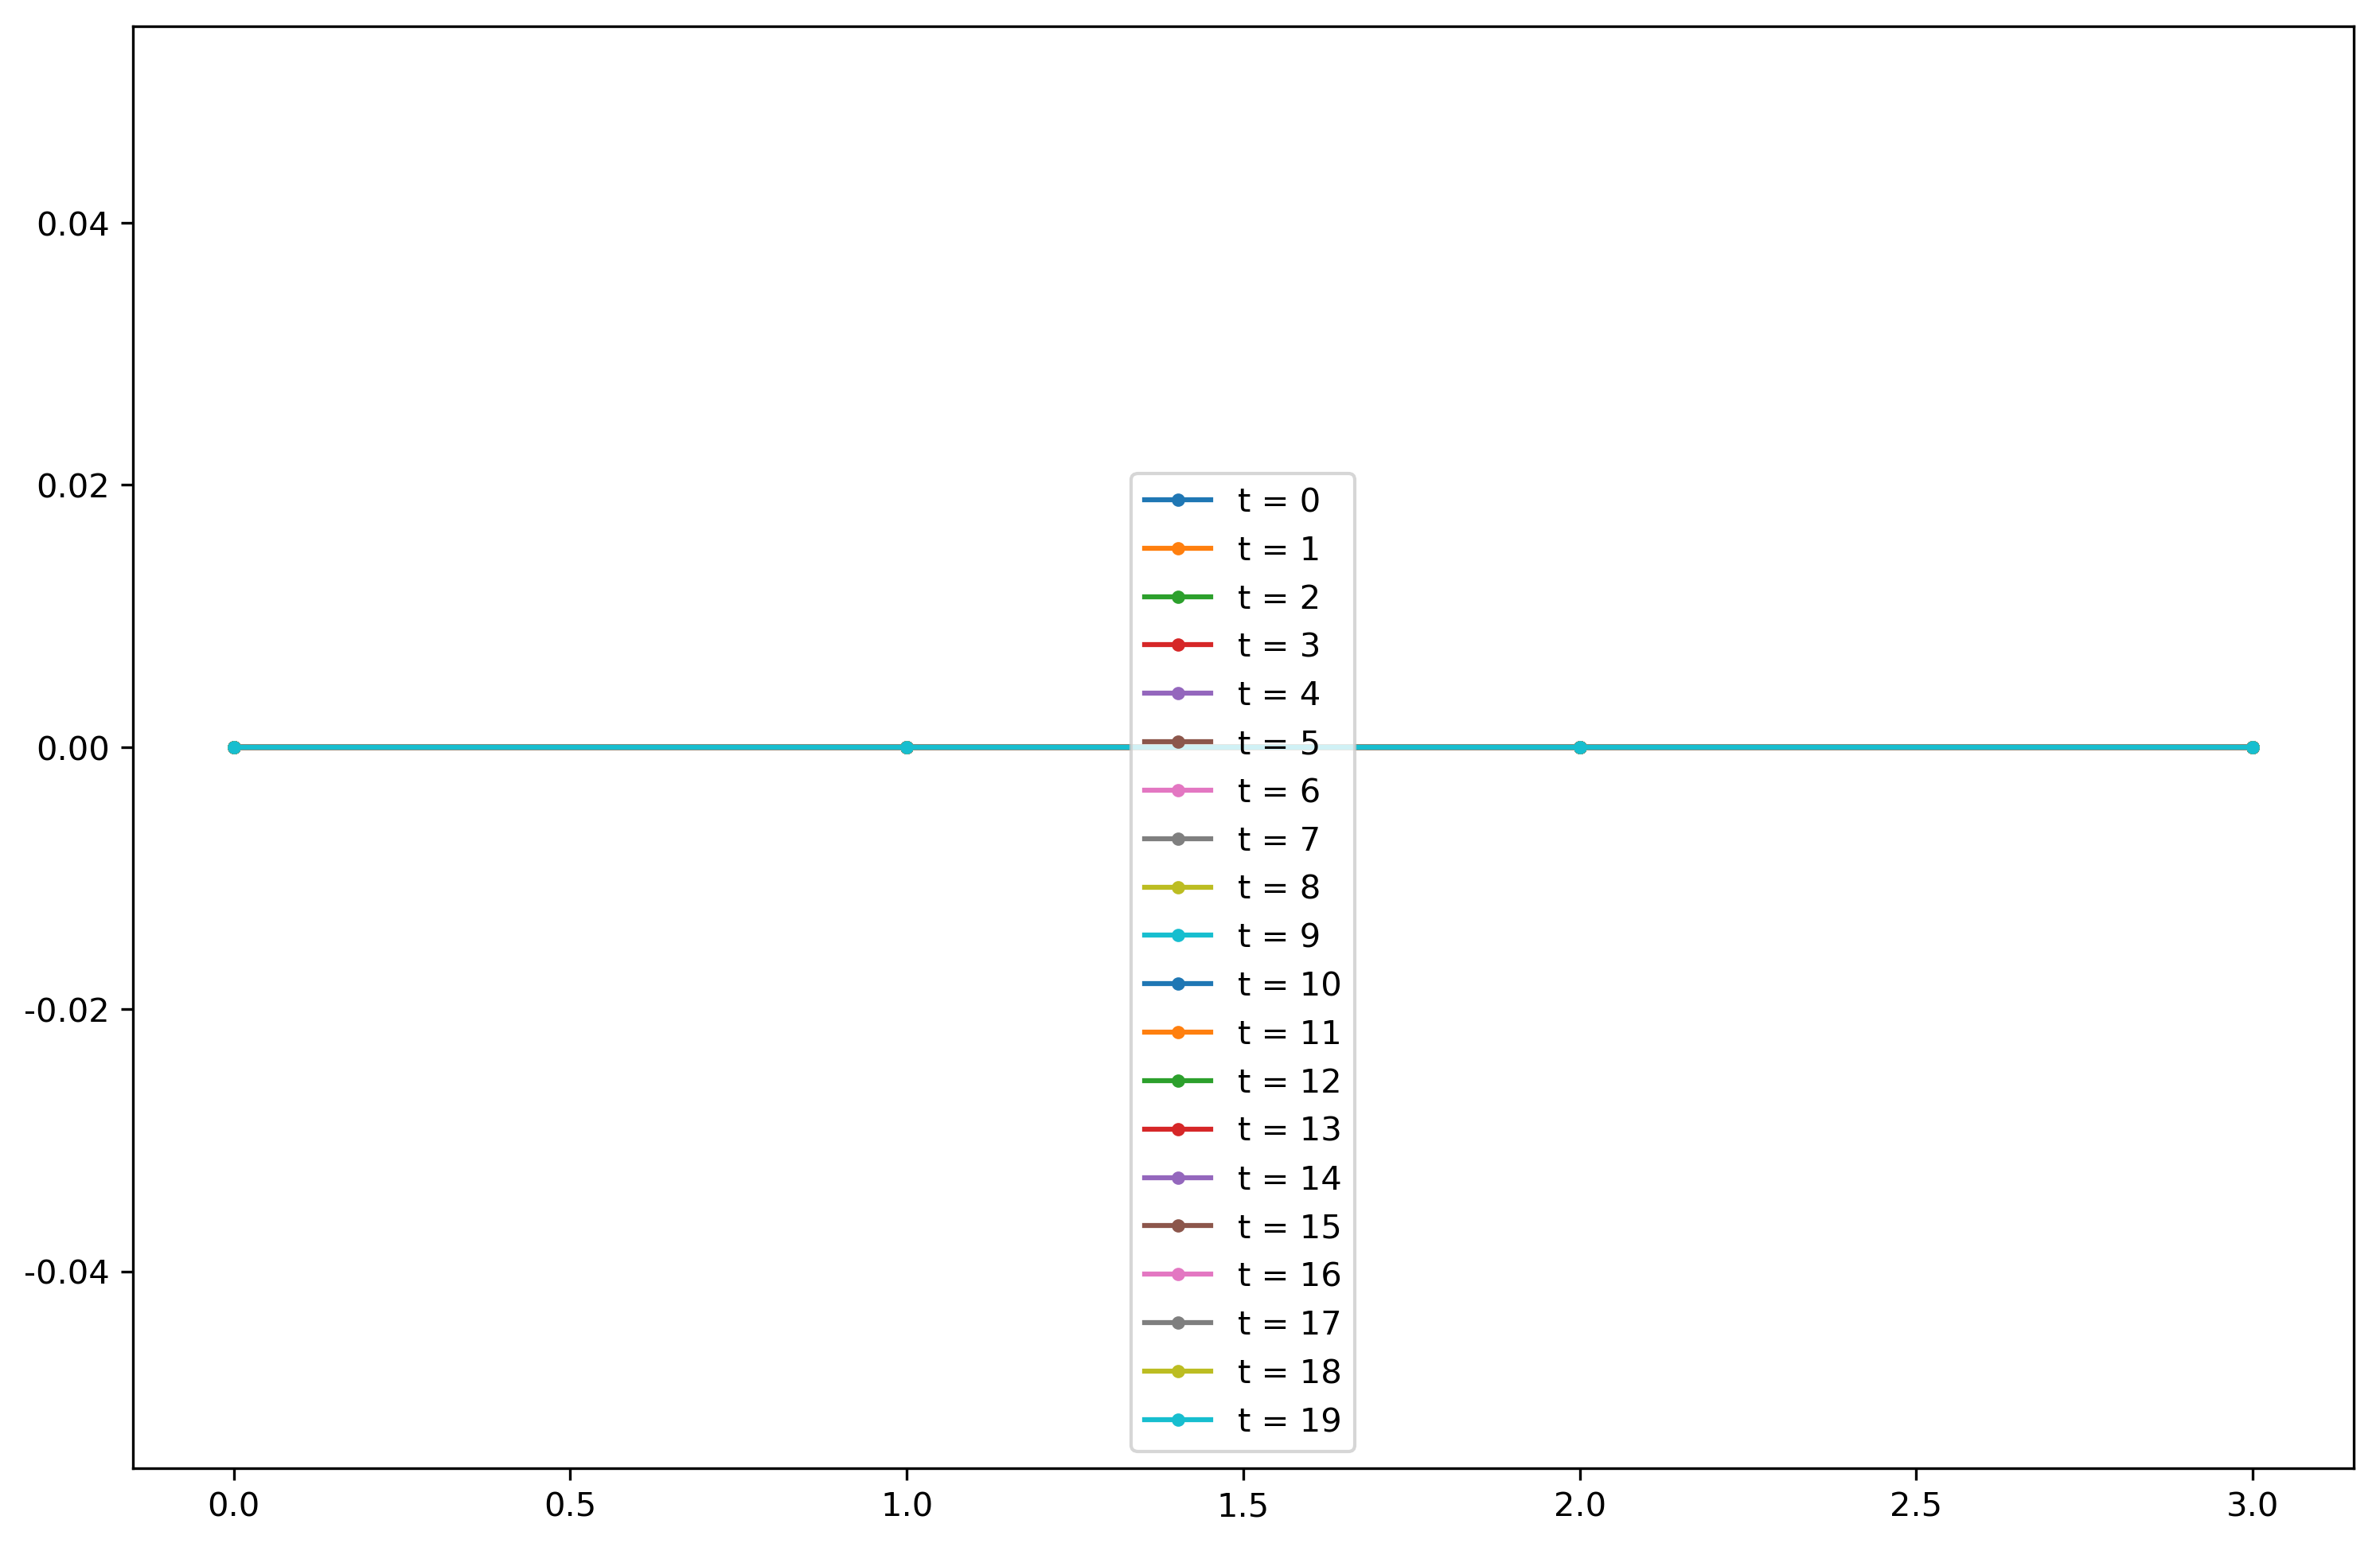

binning!
128  ---  2.667820306312753e-23
64  ---  5.377986966693961e-23
32  ---  1.0929457383926449e-22
16  ---  2.2587545260114675e-22
plotting!


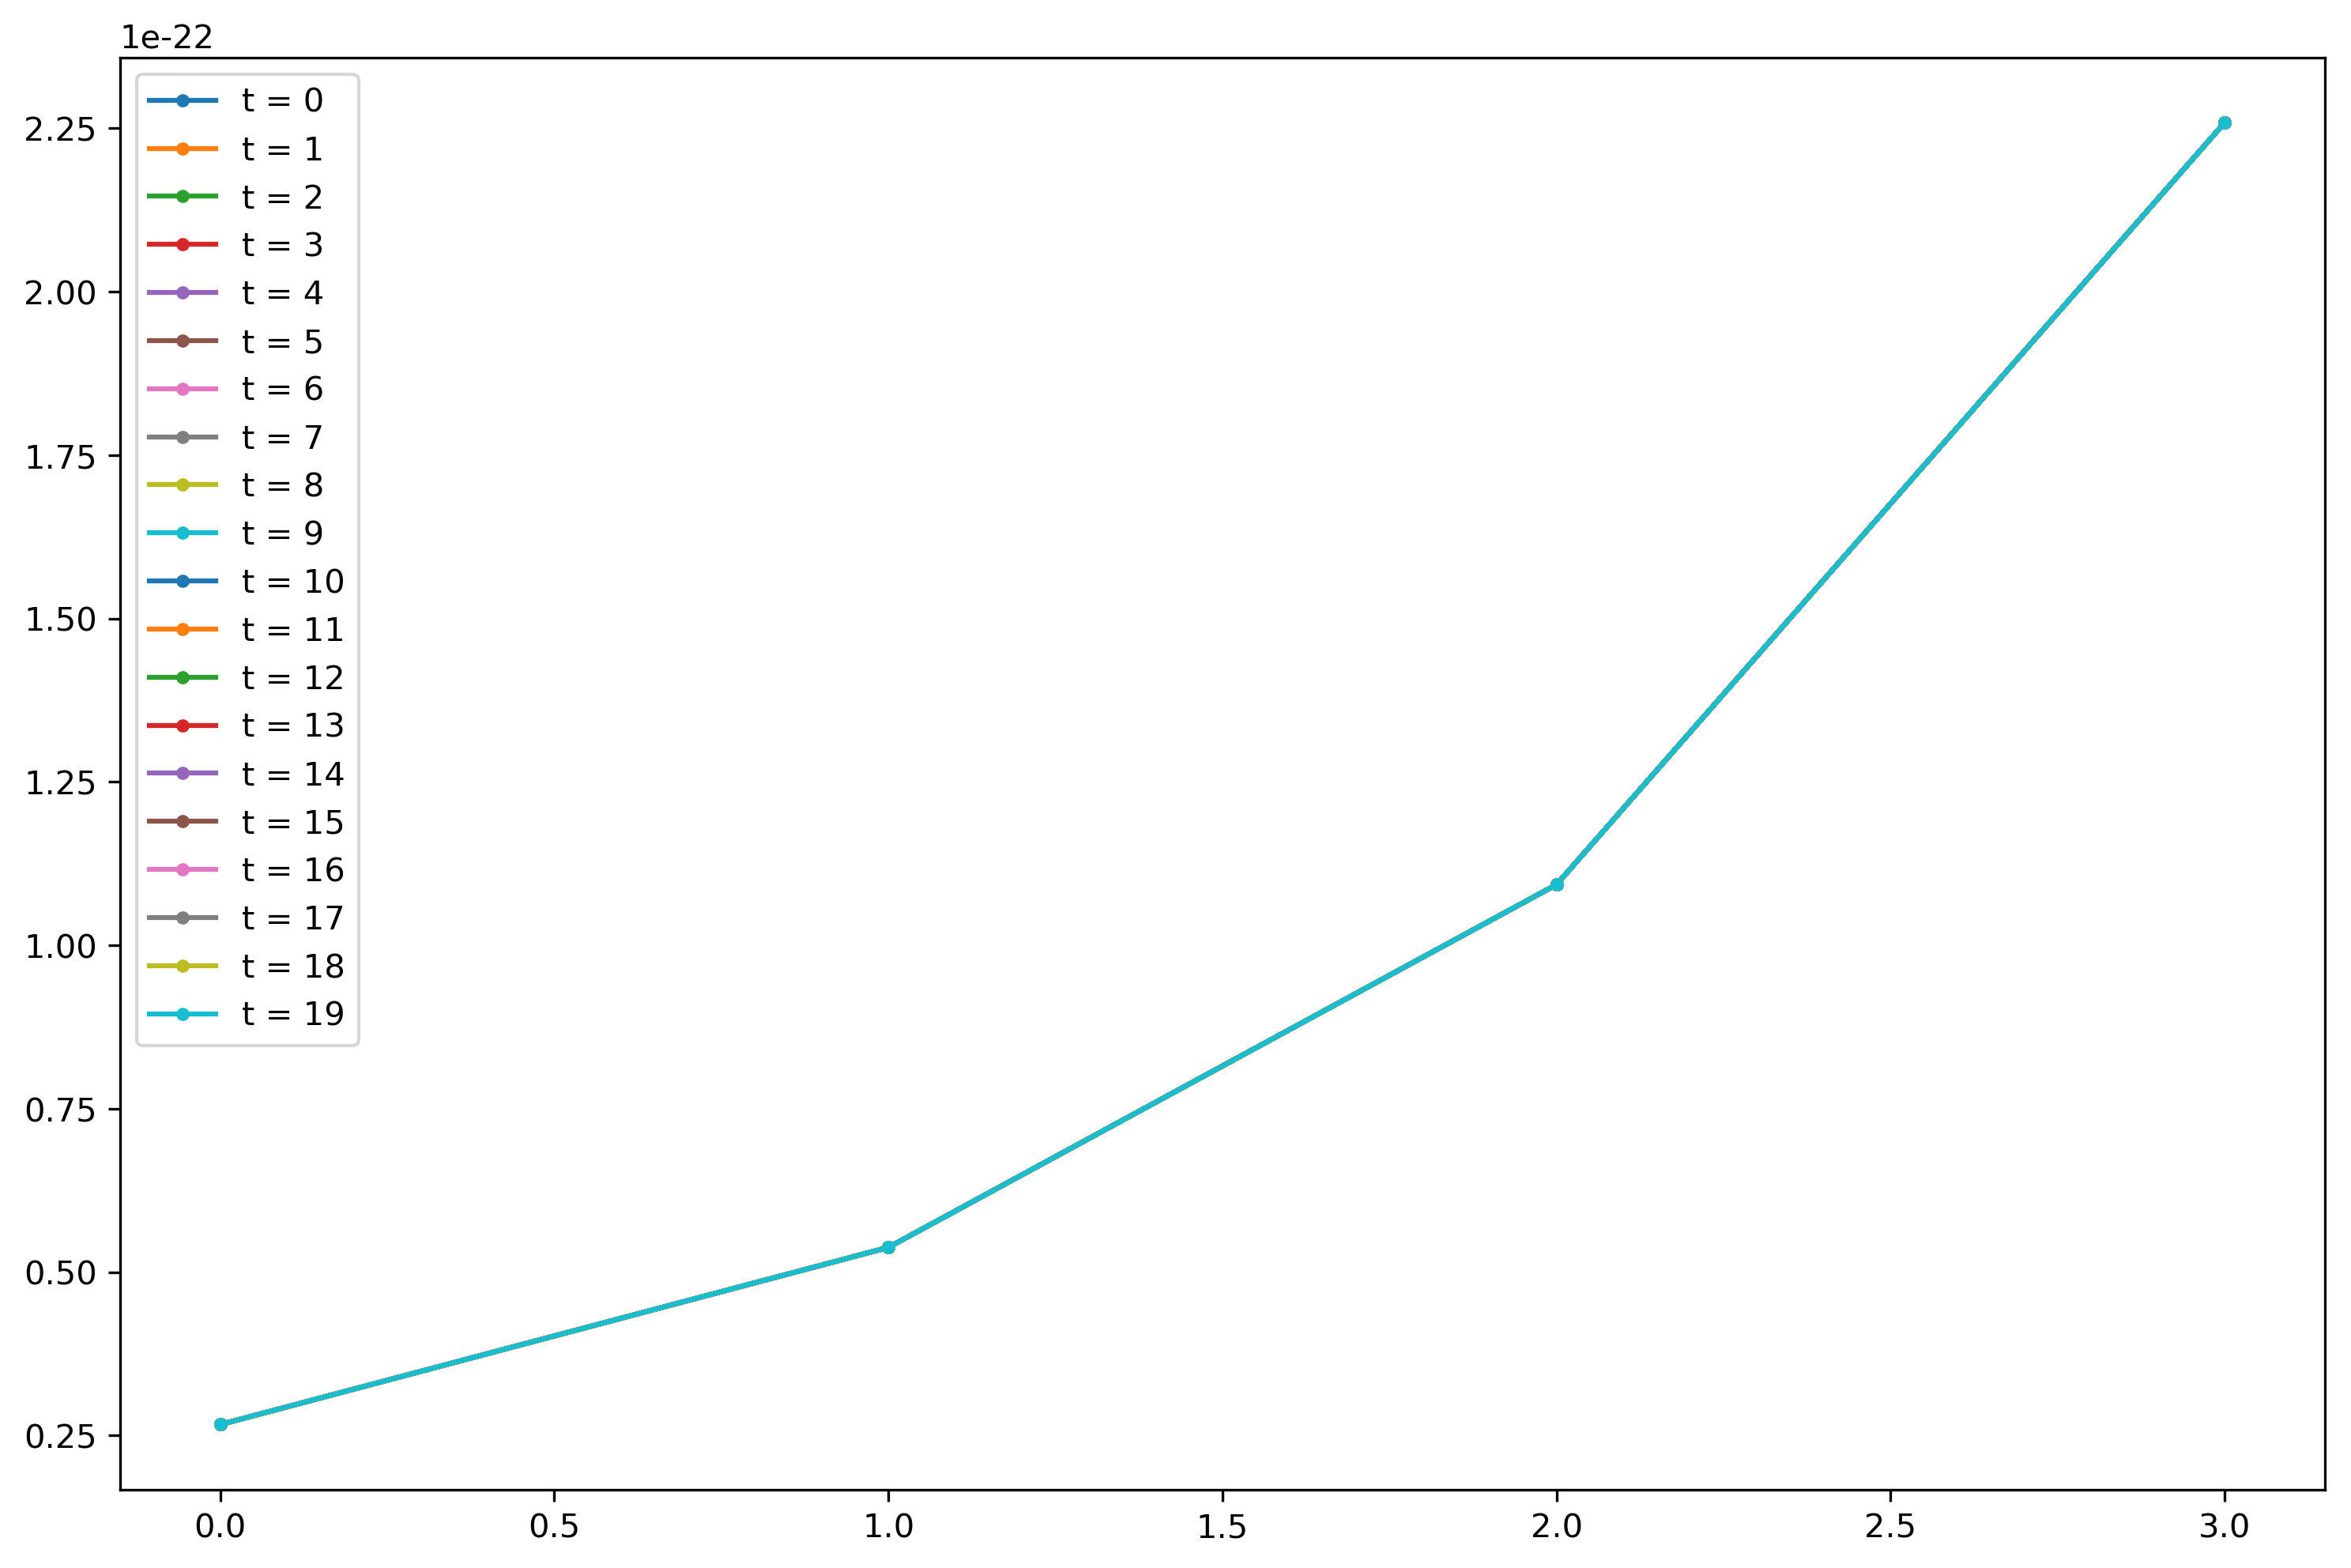

In [4]:
kw = {'binning': True, 'plzplot': True, 'plotmin': 0, 'plotmax': 20}
[t_MeanE, t_MeanEsq, t_varMeanE, t_varMeanEsq, C, ErrC] = \
 af.LoadEnergy(foldername, filenamelist, numsites, nb,
               stat_temps, temperatures, listfunctions, **kw)

In [5]:
#t_MeanM, t_MeanMsq, t_varMeanM, t_varMeanMsq, Chi, ErrChi = \
# af.LoadMagnetisation(foldername, filenamelist, numsites, nb,
#                      stat_temps, temperatures, listfunctions, **kw)

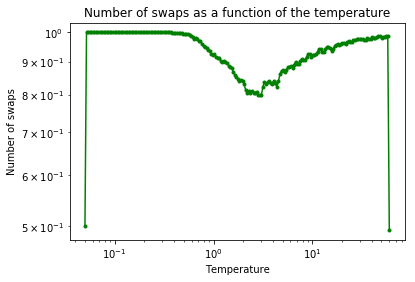

In [6]:
###########################################
        ## ALGORITHM ANALYSIS ##
###########################################
tidmin = 0
tidmax = nt
swapsth, swaps = af.LoadSwaps(foldername, filenamelist, nb, num_in_bin)
af.SwapsAnalysis(L, n, tidmin, tidmax, temperatures, foldername, results_foldername, swaps)

Verifying that the low temperatures of file  testJ1J2 correspond to the ground state.


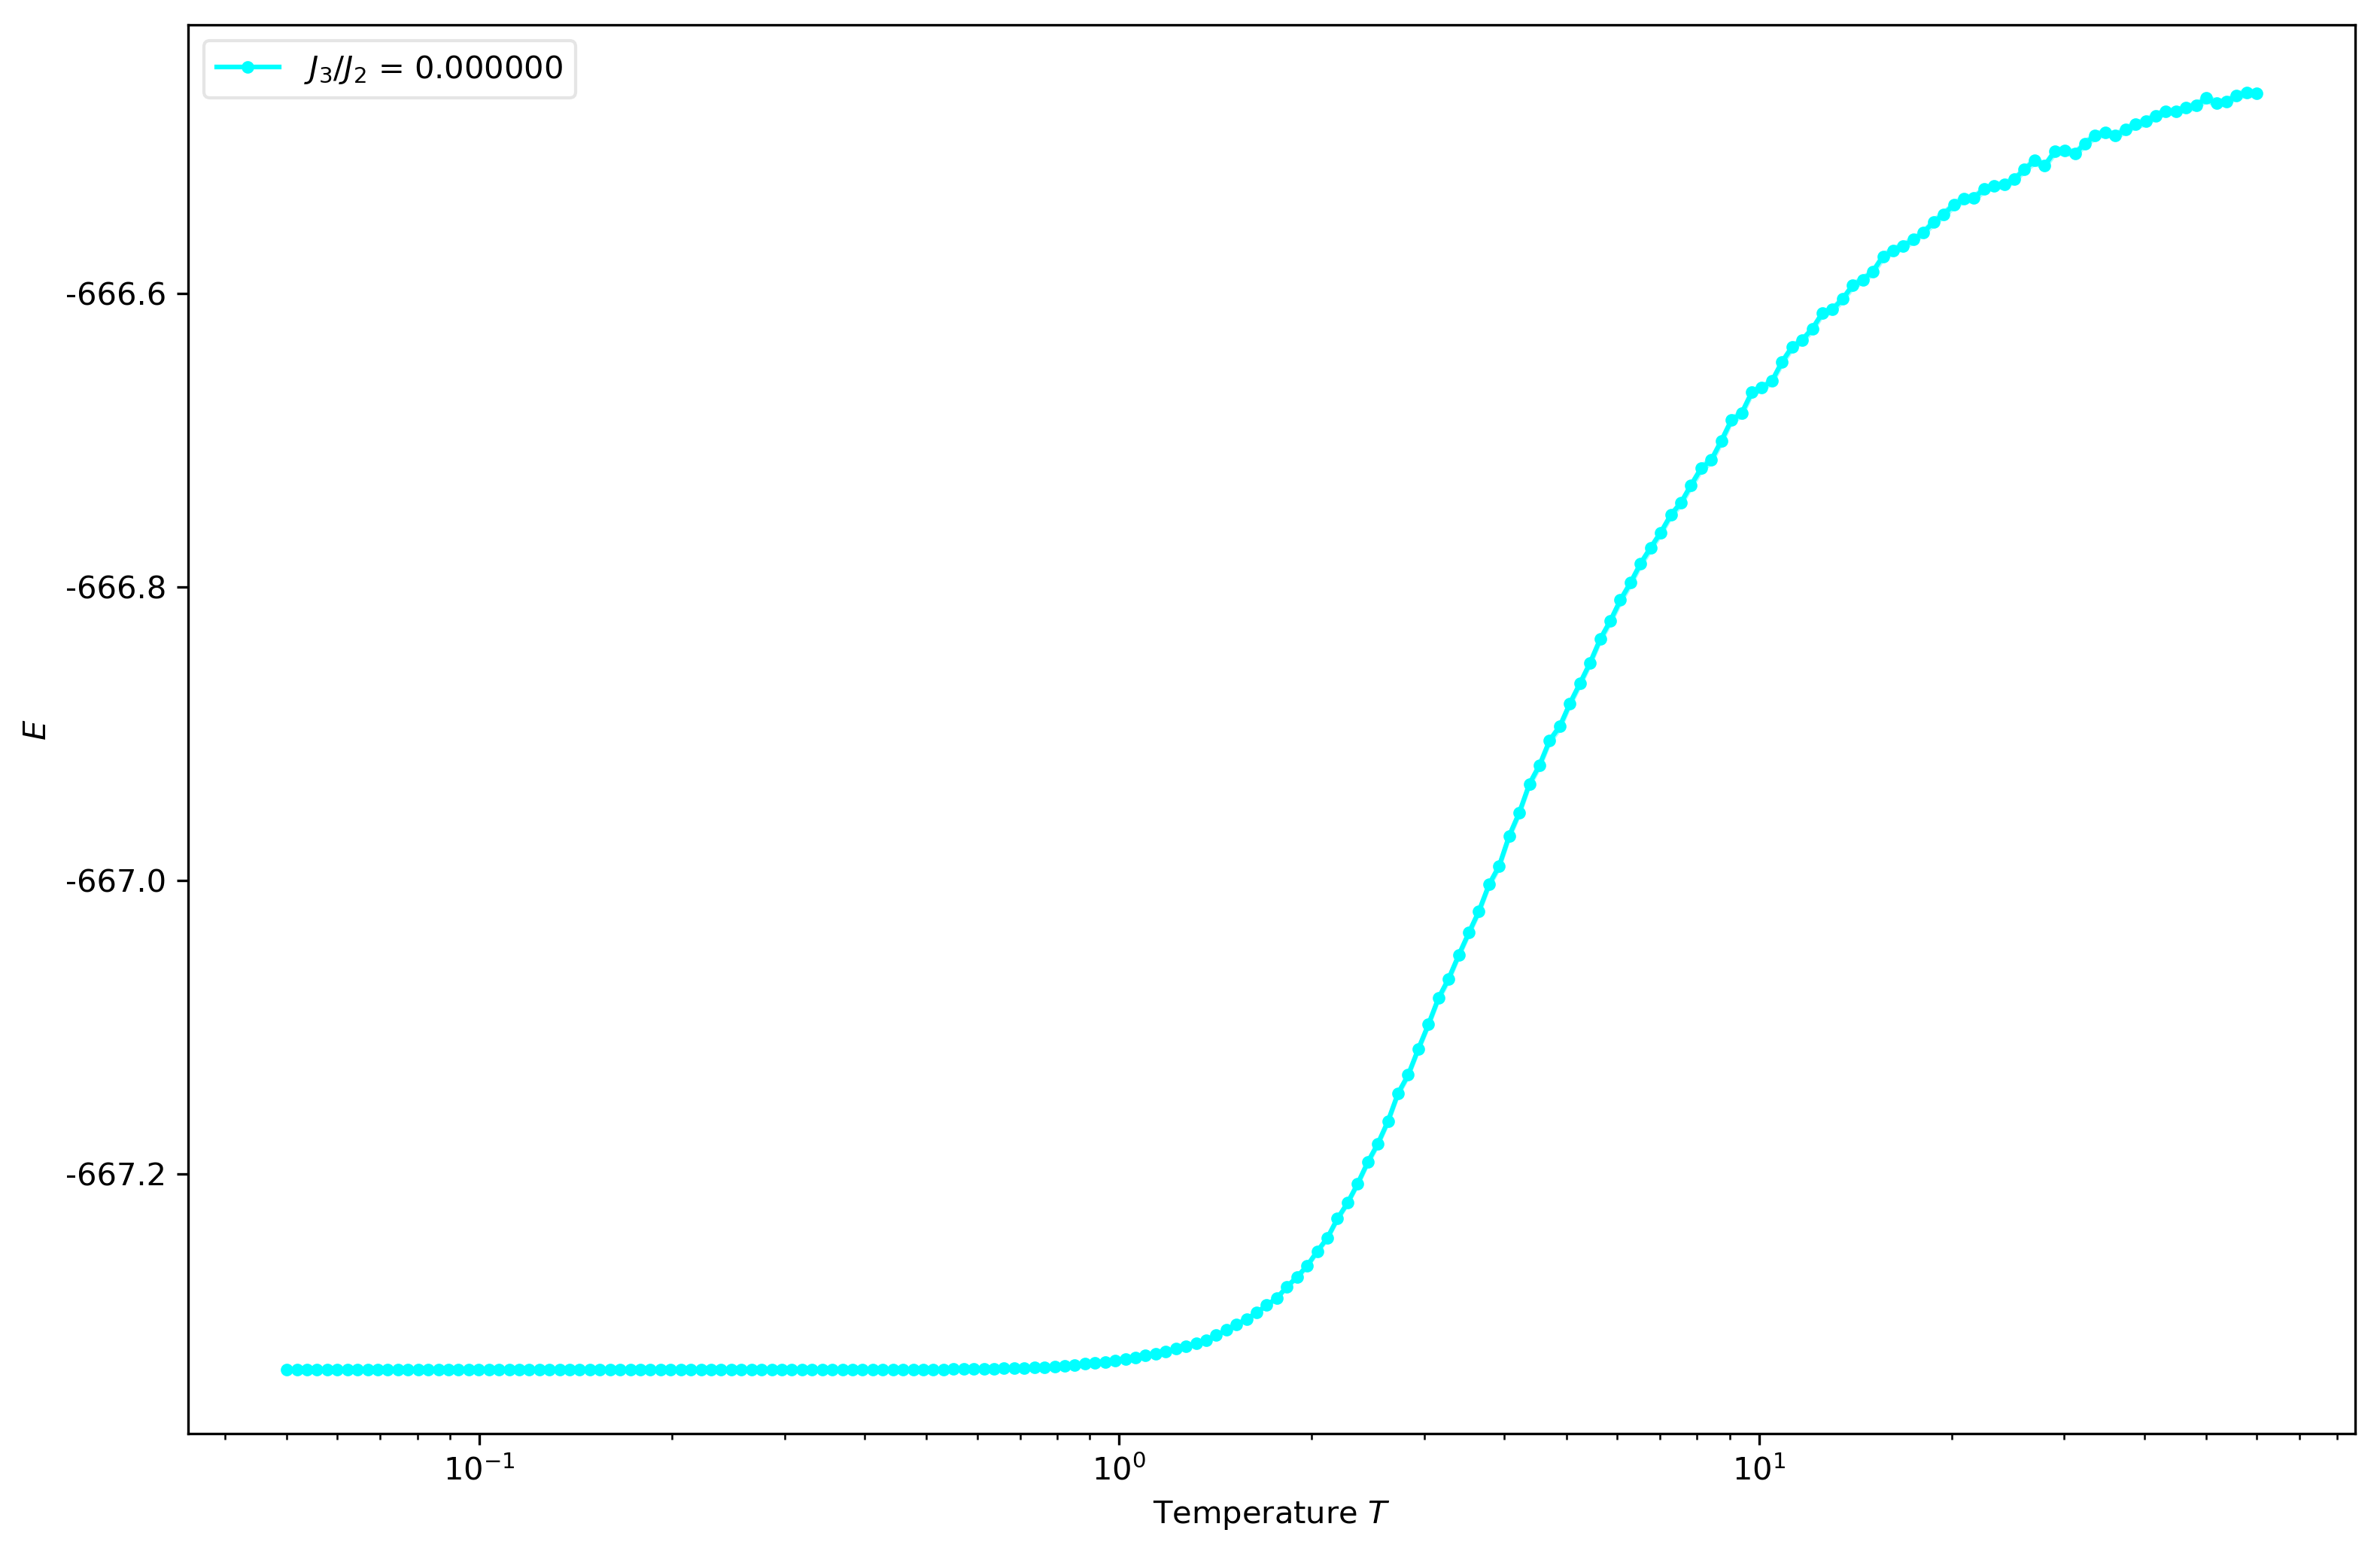

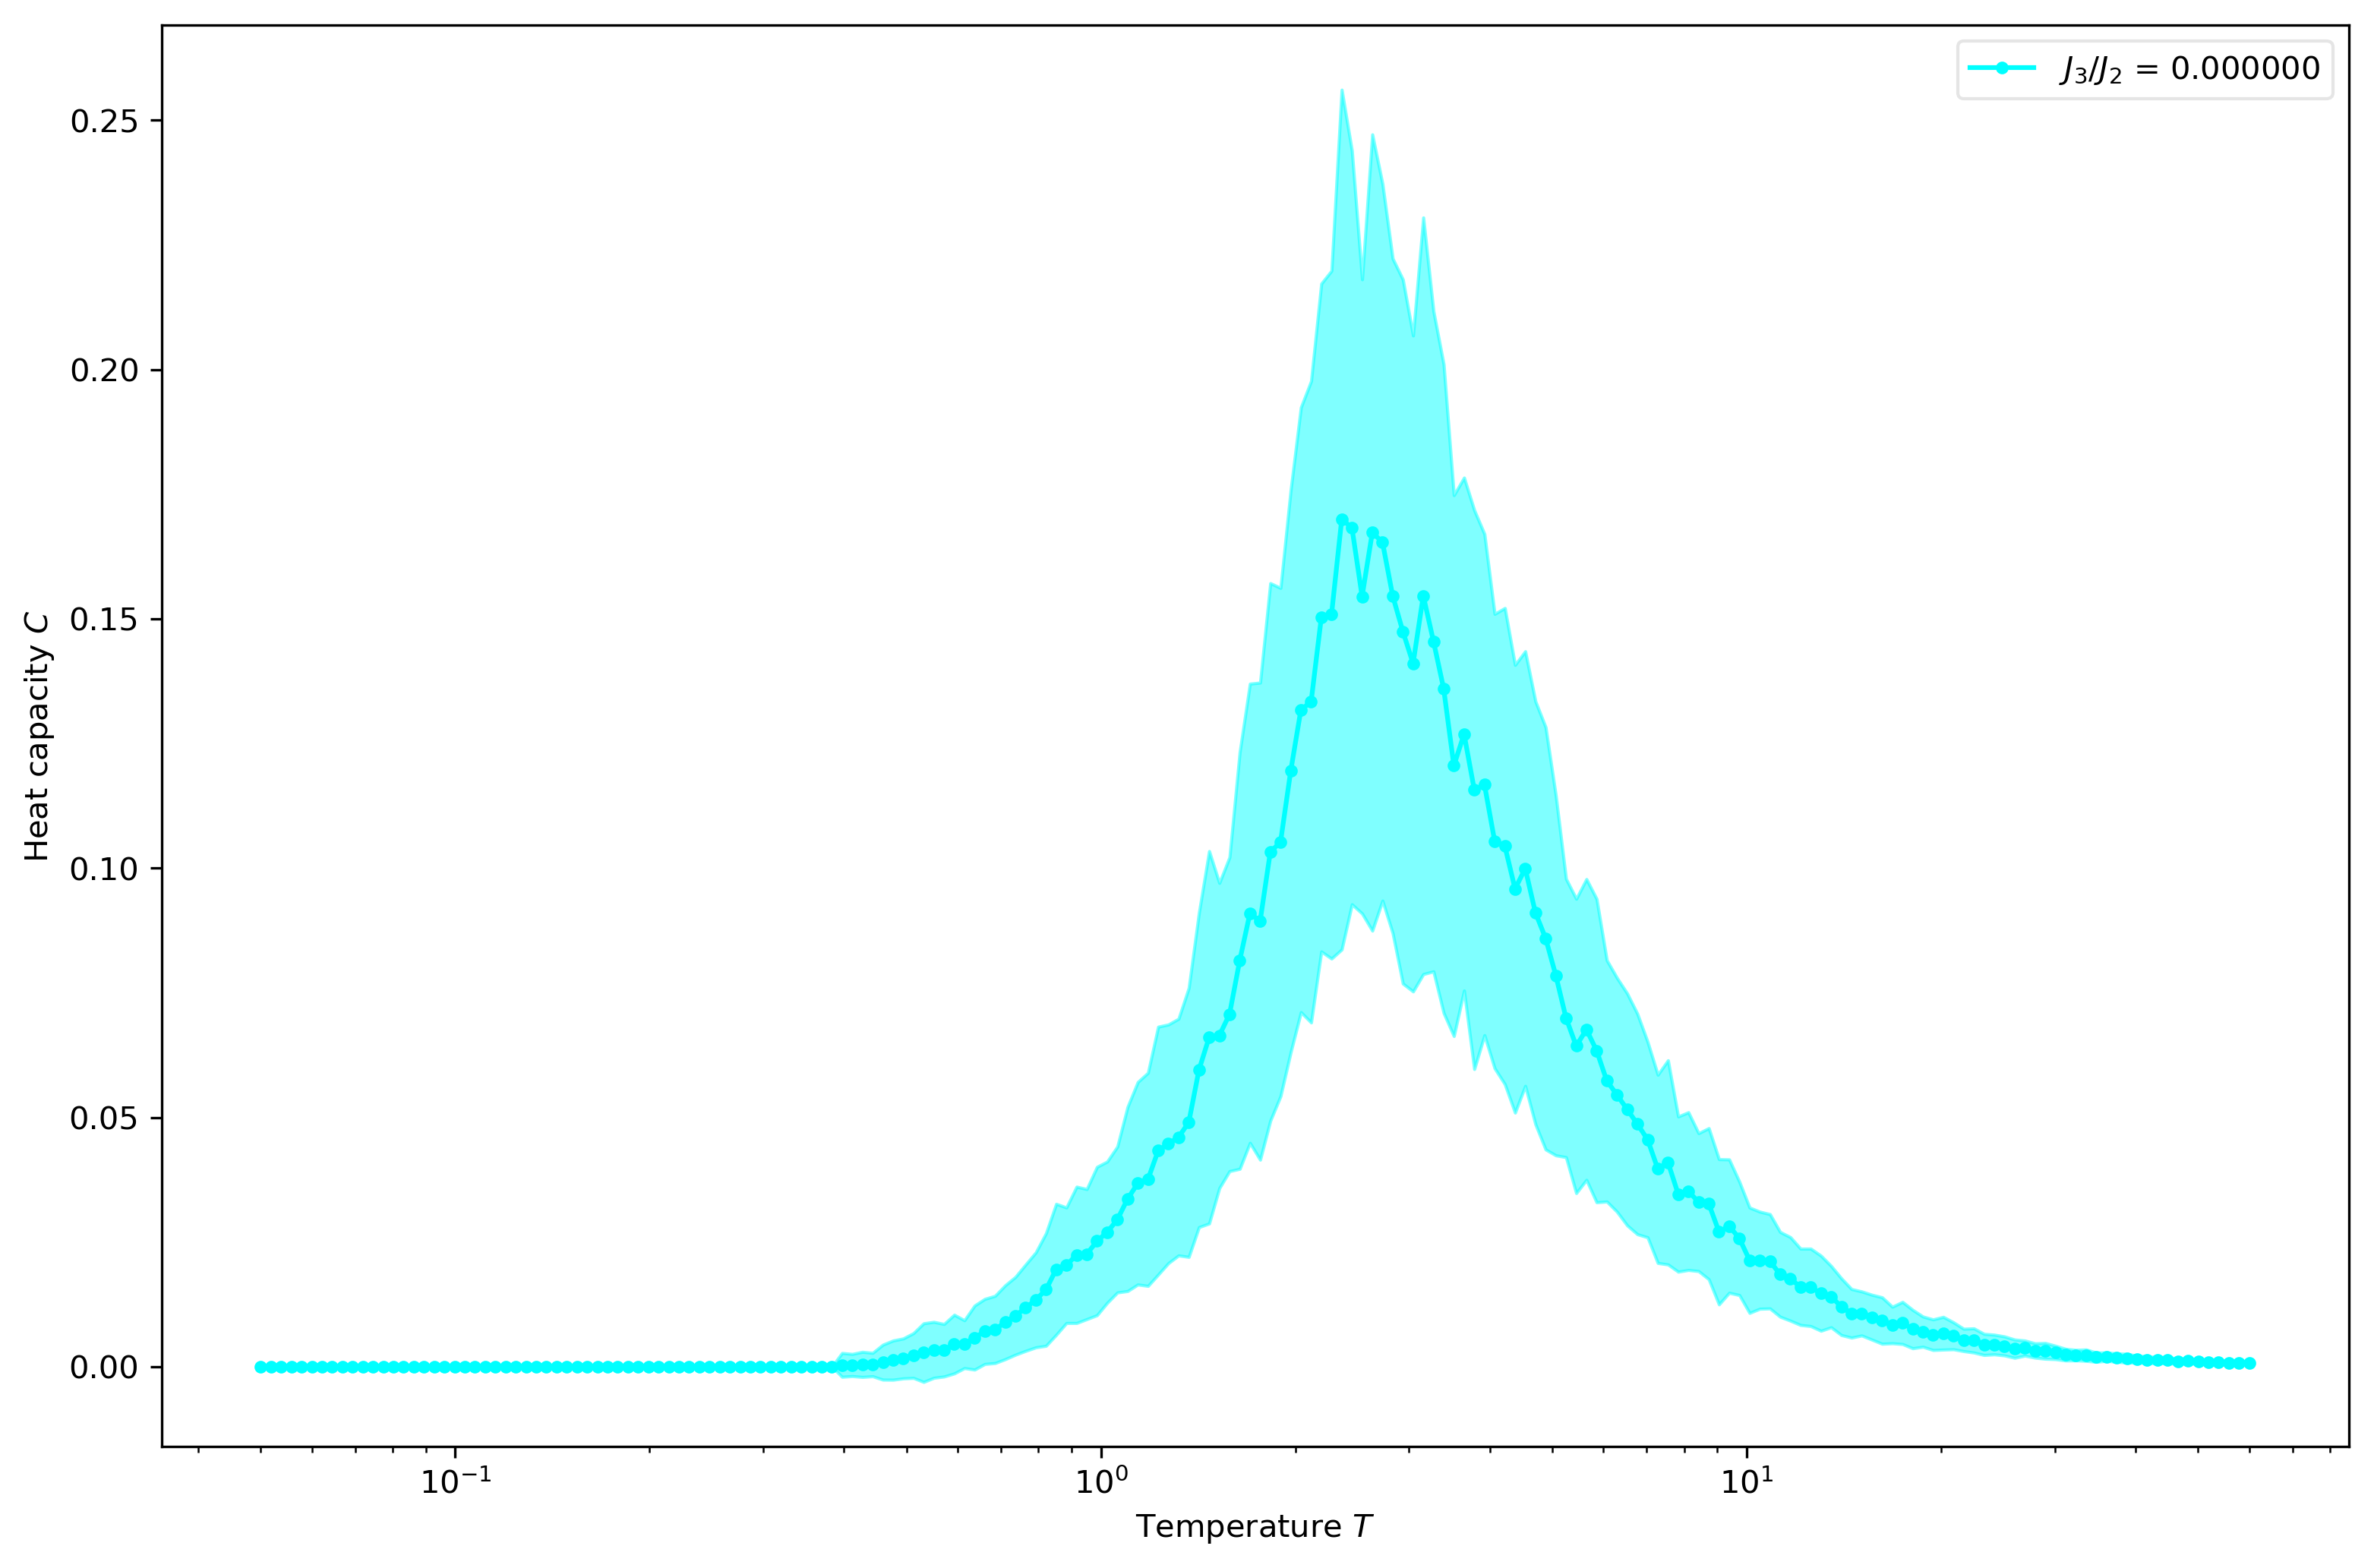

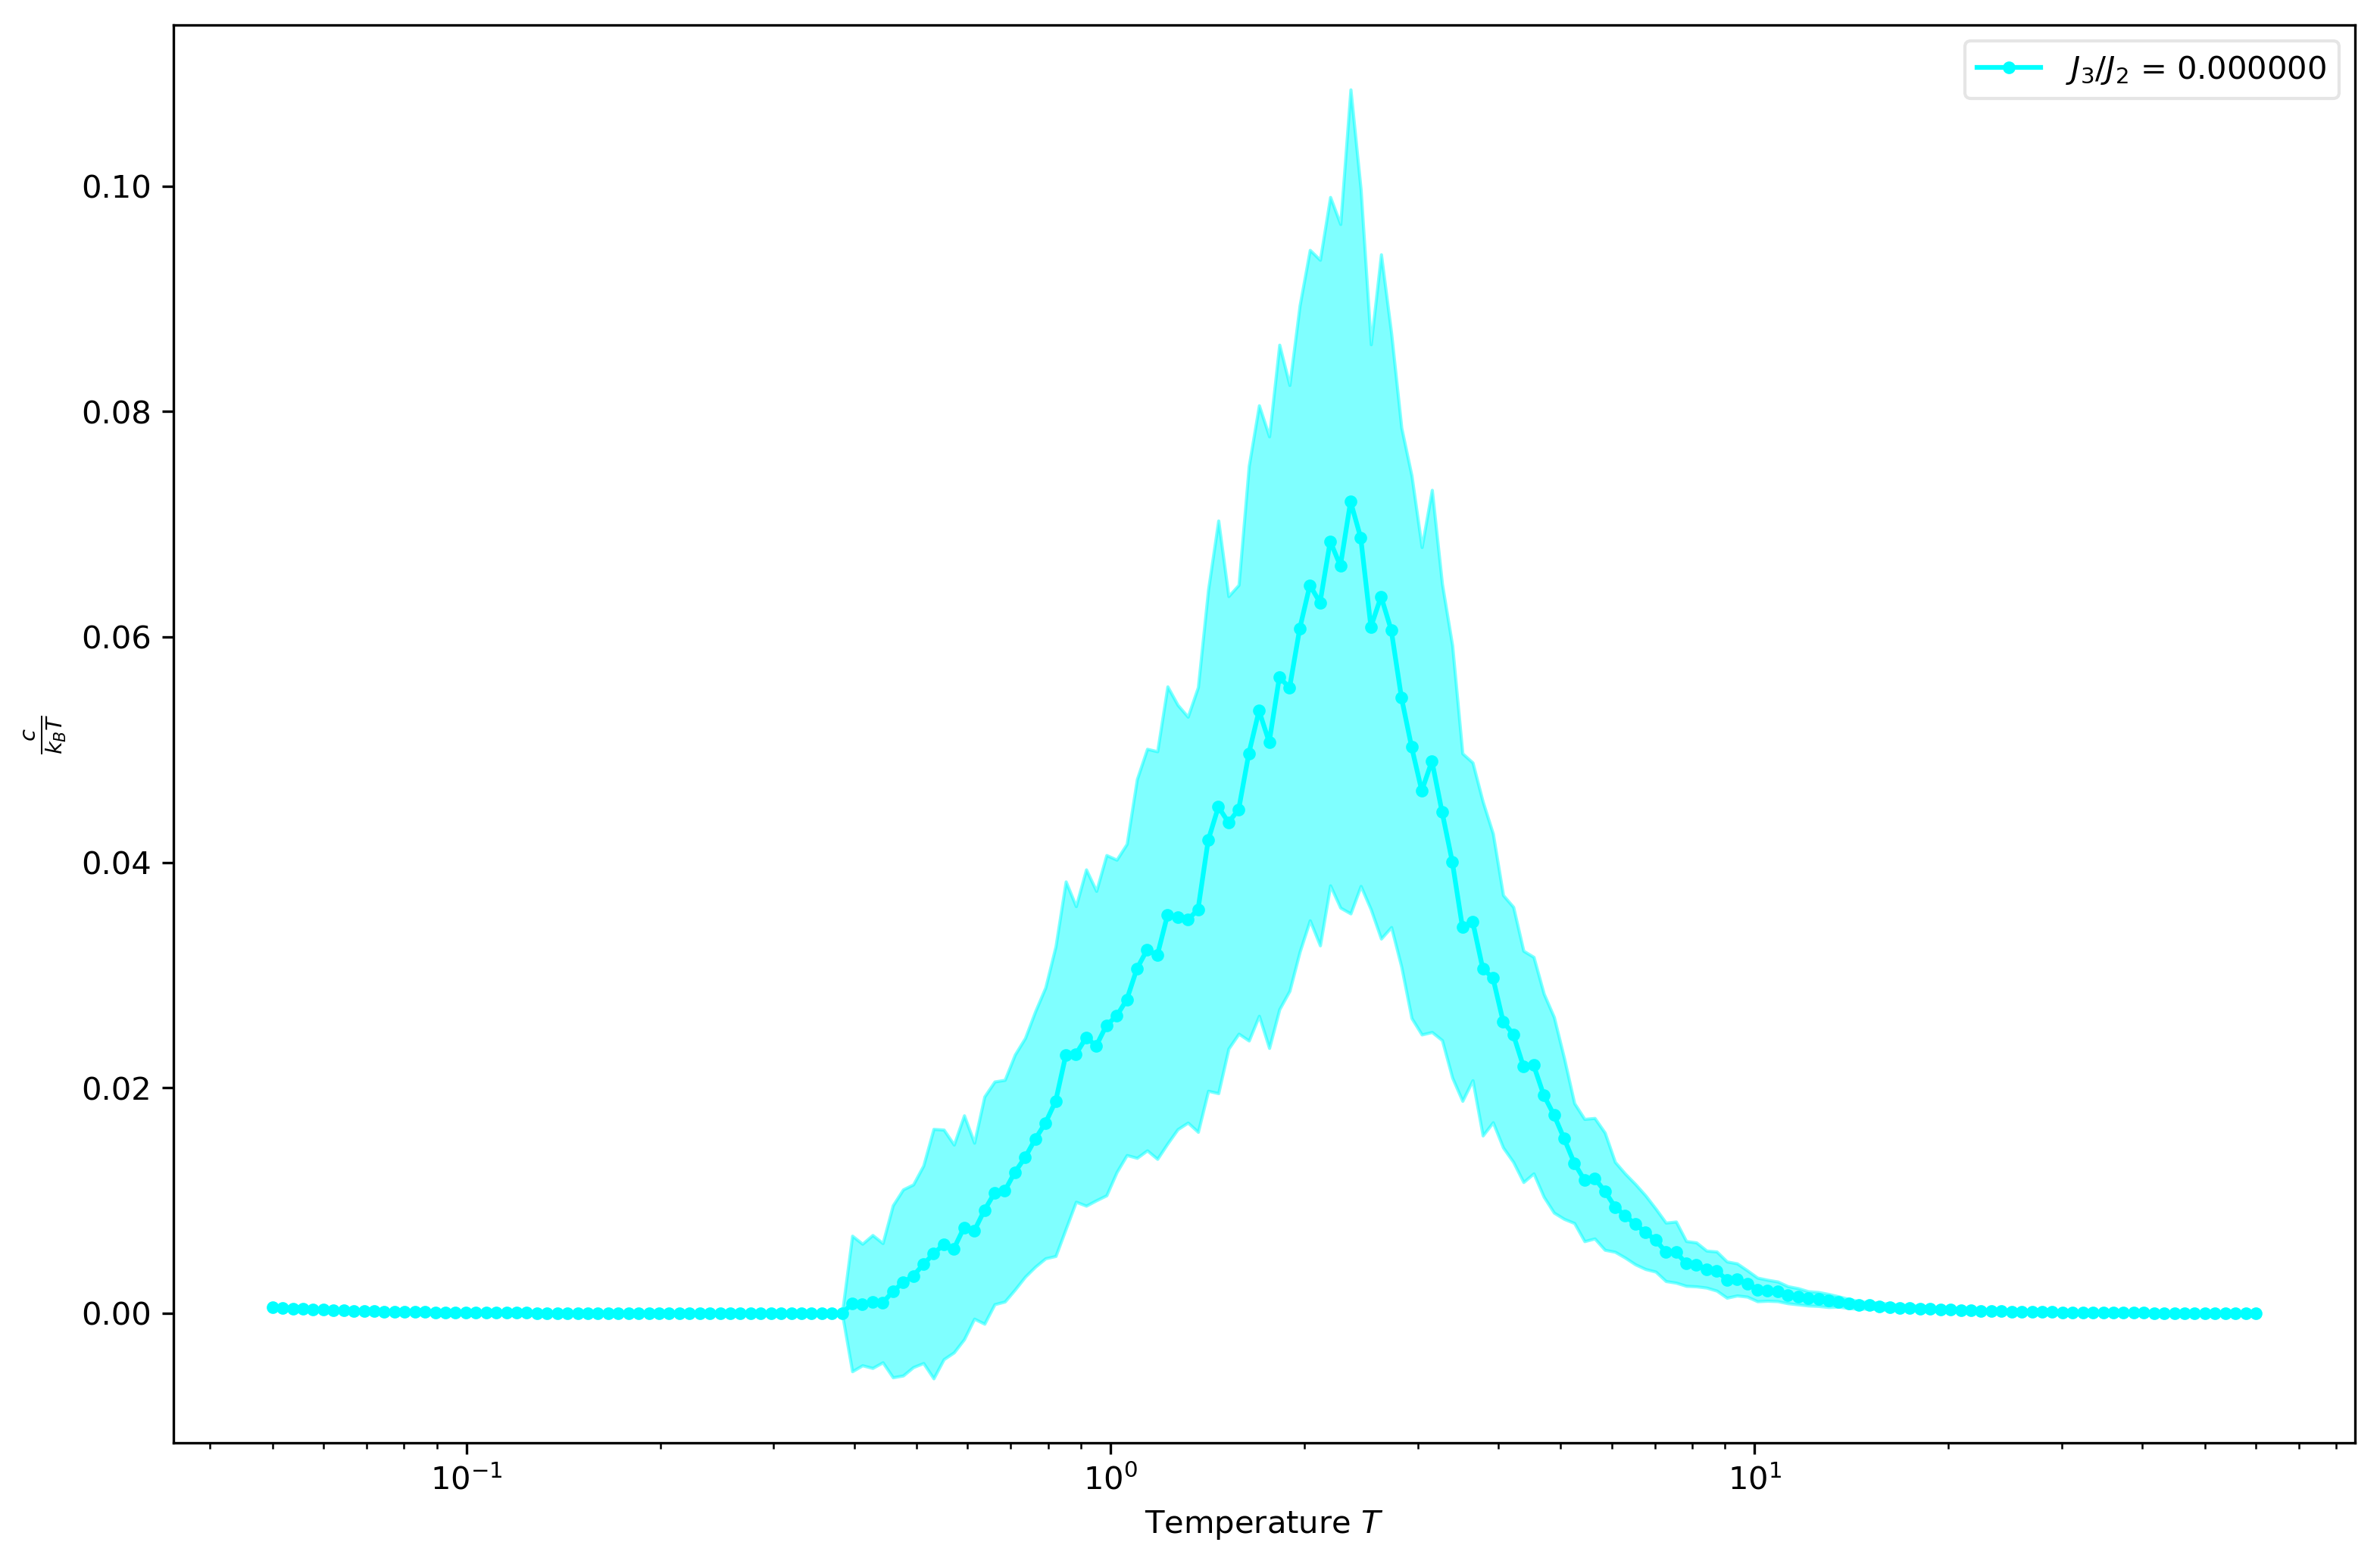

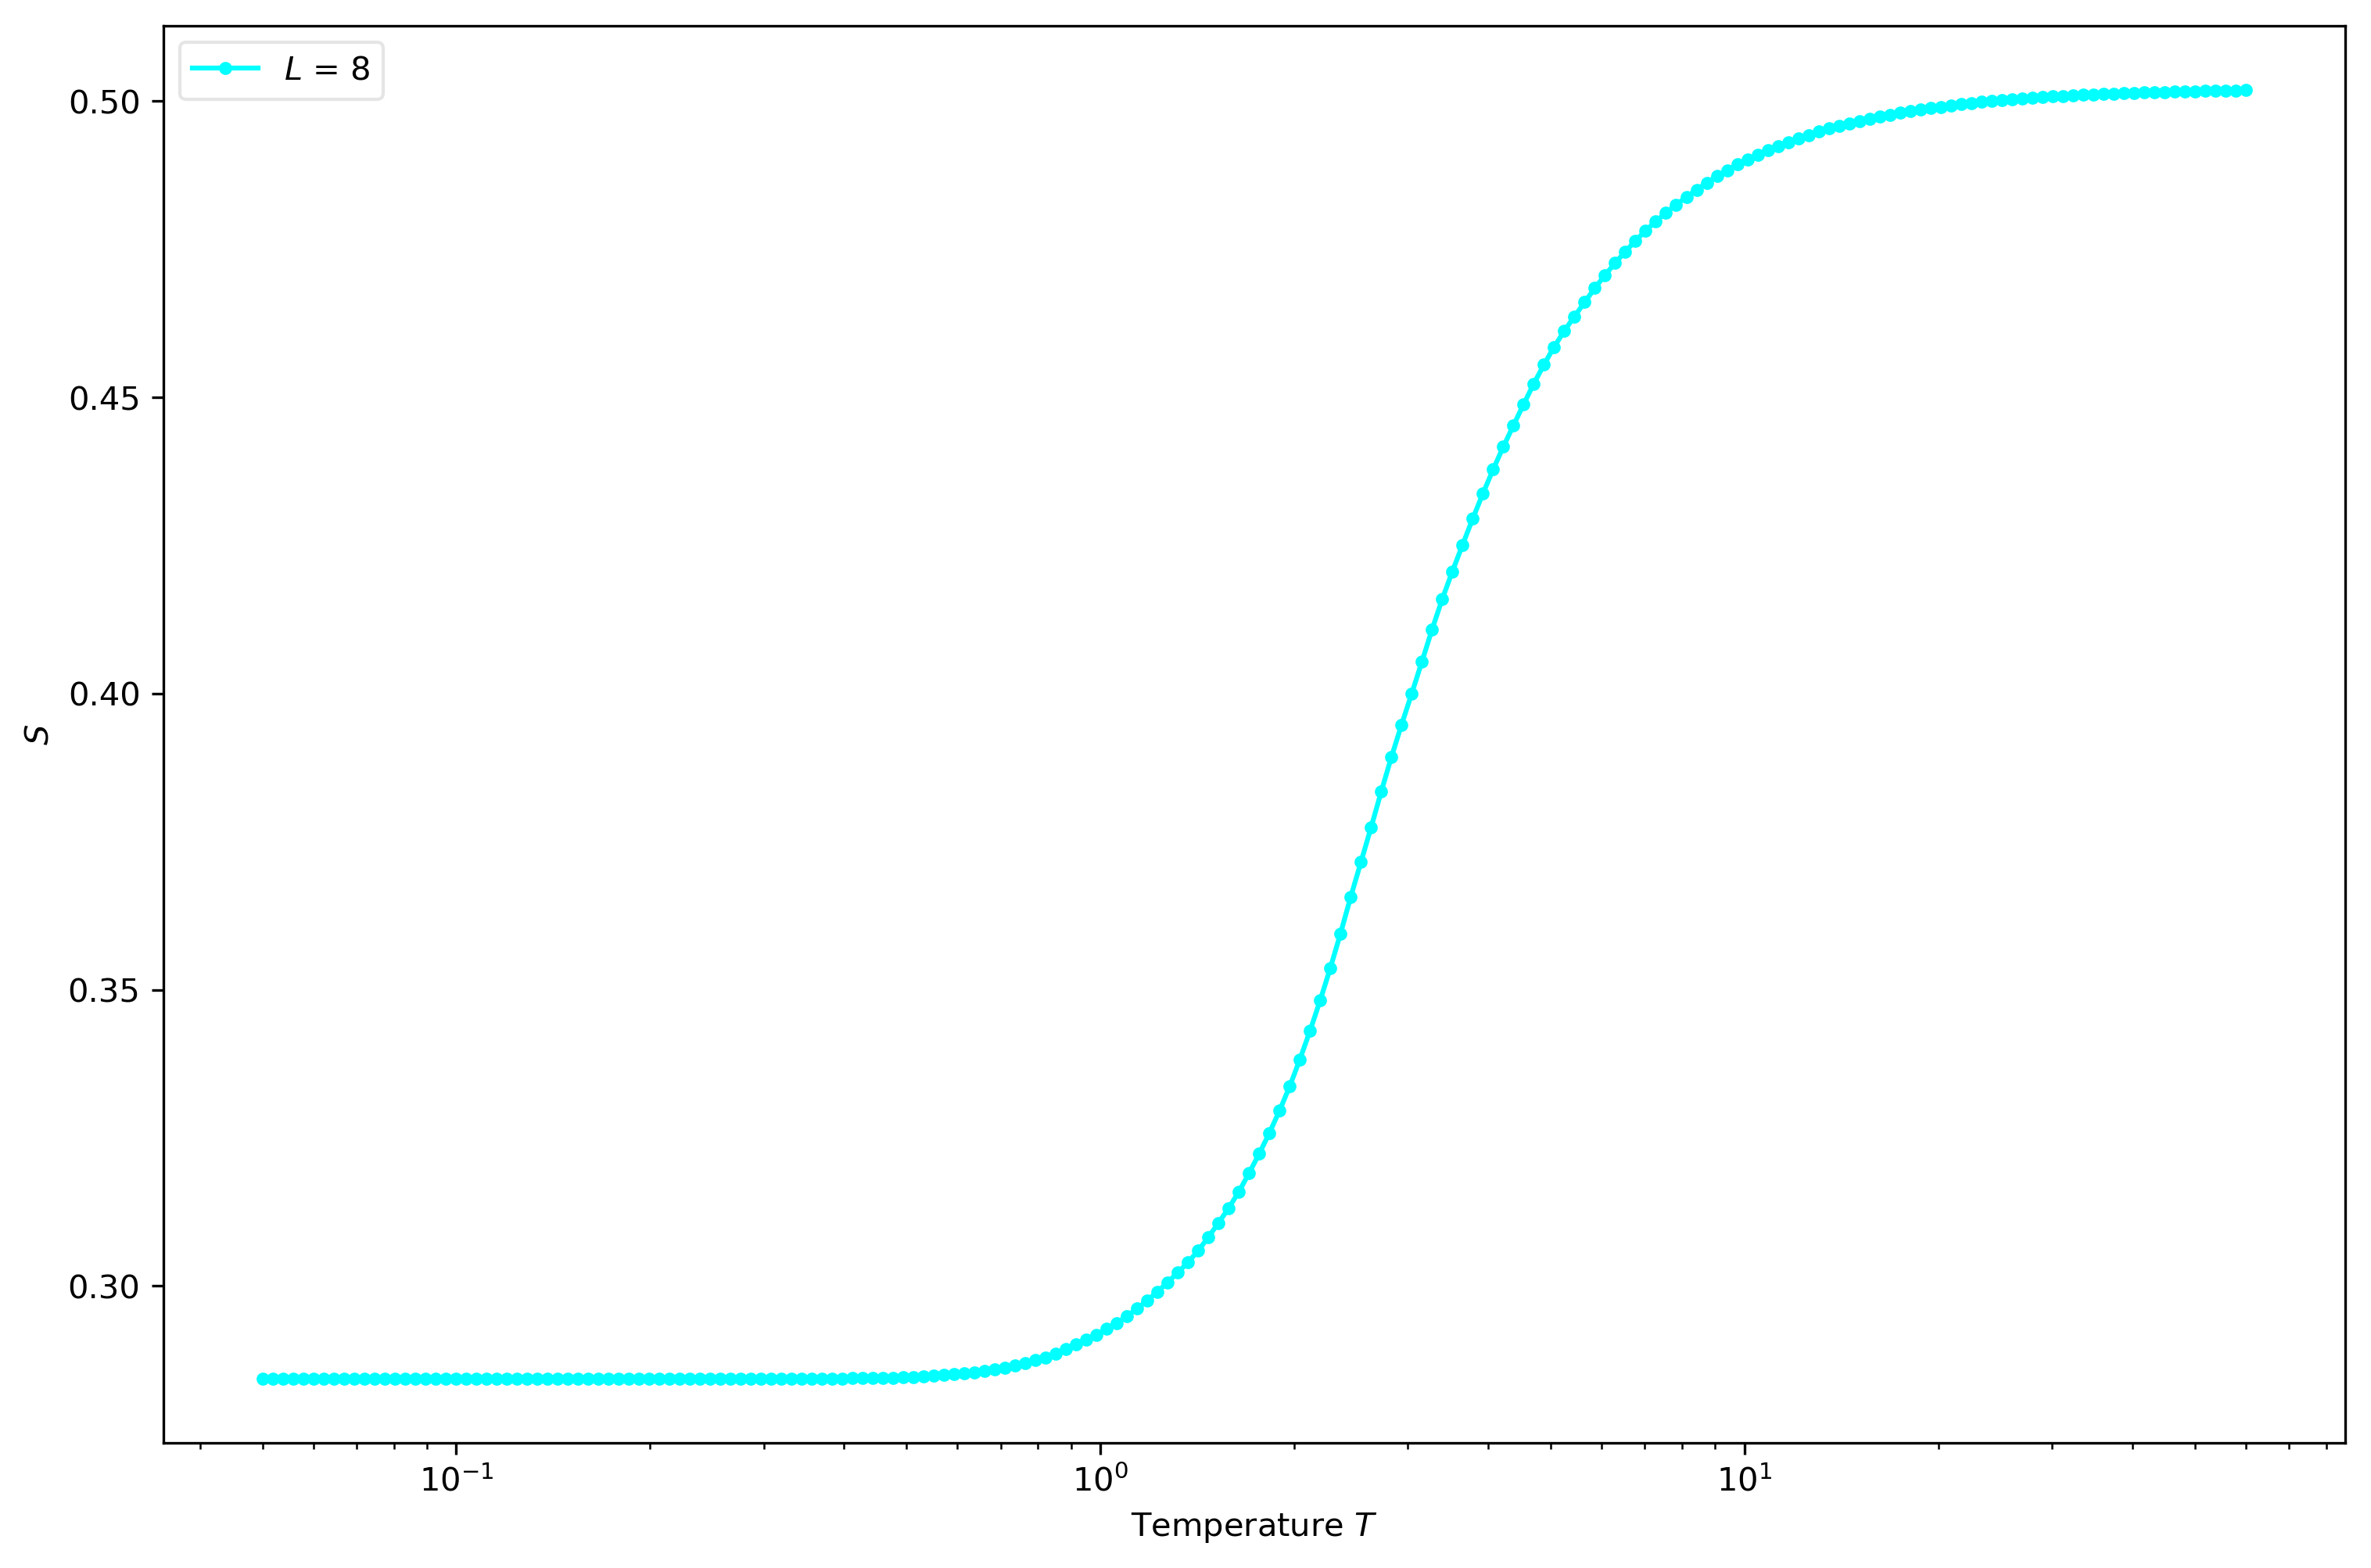

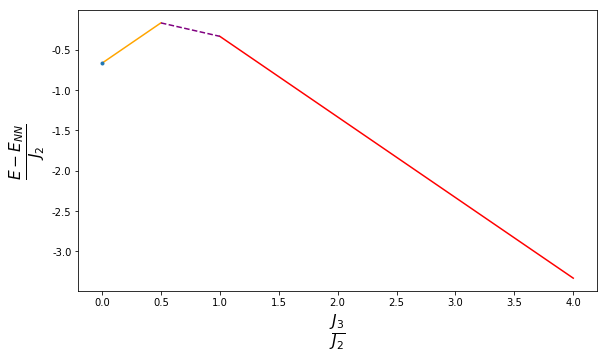

In [7]:
###########################################
        ## STATISTICS ANALYSIS ##
###########################################
tidmin = 0
tidmax = [len(stat_temps[i]) for i in range(n)]
temperatures_plots = np.array(temperatures_plots)
### Energy
S0 = 0.501833
af.BasicPlotsE(L, n, tidmin, tidmax, temperatures_plots, foldername, results_foldername, filenamelist, t_MeanE, t_MeanEsq, t_varMeanE, t_varMeanEsq, C, ErrC, J1, J2, J3, J4, S0)
### Magnetisation
#af.BasicPlotsM(L, n, tidmin, tidmax, temperatures_plots, foldername, results_foldername, filenamelist, t_MeanM, t_MeanMsq, t_varMeanM, t_varMeanMsq, Chi, ErrChi, J1, J2, J3, J4)